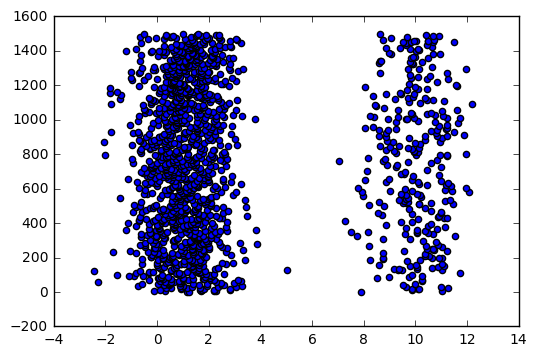

In [75]:
import numpy as np
from math import *
x1=np.random.normal(loc=1,scale=1,size=(1200,1))
x2=np.random.normal(loc=10,scale=1,size=(300,1))
#高斯混合模型的EM 算法
x=np.vstack((x1,x2))
np.random.shuffle(x)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,np.arange(len(x)))
plt.show()

EM算法。完全数据的对数似然对在给定参数和当前观测下的隐变量的条件概率期望：
\[\begin{array}{l}
{E_Z}(\log P(Y,Z|\theta ),Y,\bar \theta )\\
 = \sum\limits_Z {P(Z|Y,\bar \theta )\log P(Y,Z|\theta )} \\
 = \sum\limits_Z {\frac{{P(Z,Y|\bar \theta )}}{{P(Y|\bar \theta )}}\log P(Y,Z|\theta )} \\
 = \sum\limits_Z {\frac{{P(Z,Y|\bar \theta )}}{{\sum\limits_z {P(Z,Y|\bar \theta )} }}\log P(Y,Z|\theta )} \\
Let {\rm{ }}{\mu _z} = \frac{{P(Z,Y|\bar \theta )}}{{\sum\limits_z {P(Z,Y|\bar \theta )} }},then\\
Q = \sum\limits_Z {{\mu _z}\log P(Y,Z|\theta )} \\
 = \sum\limits_j {\sum\limits_z {{\mu _z}\log P({y_j},z|\theta )} } \\
L(\theta ,\bar \theta ) = \sum\limits_j {\sum\limits_z {{\mu _z}\log P({y_j},z|\theta )} }  + \lambda (\sum\limits_i {{\pi _i}}  - 1)
\end{array}\]


\[\begin{gathered}
  P(y|\theta ) = \sum\limits_k {{\alpha _k}\frac{{{e^{ - \frac{{{{(y - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}}}  \hfill \\
  P(y,\gamma |\theta ) = \prod\limits_j {\prod\limits_k {{{({\alpha _k}\frac{{{e^{ - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}})}^{{\gamma _{jk}}}}} }  \hfill \\
  \log P(y,\gamma |\theta ) = \sum\limits_j {\sum\limits_k {{\gamma _{jk}}(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})} }  \hfill \\
  Q(\theta ,\bar \theta ) = {E_\gamma }(\log P(y,\gamma |\theta )) \hfill \\
   = \sum\limits_j {\sum\limits_k {E({\gamma _{jk}})(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})} }  \hfill \\
   = \sum\limits_j {\sum\limits_k {(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})\frac{{P({\gamma _{jk}} = 1,{y_j}|\bar \theta )}}{{\sum\limits_k {P({\gamma _{jk}} = 1,{y_j}|\bar \theta )} }}} }  \hfill \\
   = \sum\limits_j {\sum\limits_k {(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})\frac{{P({y_j}|{\gamma _{jk}} = 1,\theta )P({\gamma _{jk}} = 1|\bar \theta )}}{{\sum\limits_k {P({y_j}|{\gamma _{jk}} = 1,\theta )P({\gamma _{jk}} = 1|\bar \theta )} }}} }  \hfill \\
   = \sum\limits_j {\sum\limits_k {(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})\frac{{{\alpha _k}\frac{{{e^{ - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}}}}{{\sum\limits_k {{\alpha _k}\frac{{{e^{ - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}}} }}} }  \hfill \\
  Let{\text{ }}{{\hat \gamma }_{jk}} = \frac{{{\alpha _k}\frac{{{e^{ - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}}}}{{\sum\limits_k {{\alpha _k}\frac{{{e^{ - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}}}}}}{{\sqrt {2\pi } {\sigma _k}}}} }} \hfill \\
  Q(\theta ,\bar \theta ) = \sum\limits_j {\sum\limits_k {{{\hat \gamma }_{jk}}(\log ({\alpha _k}) - \log \sqrt {2\pi }  - \log ({\sigma _k}) - \frac{{{{({y_j} - {\mu _k})}^2}}}{{2\sigma _k^2}})} }  \hfill \\ 
\end{gathered} \]

In [88]:
class GaussEM(object):
    def __init__(self,classnum=2):
        self.classnum=classnum
        self.pai=np.ones((classnum,1))/classnum
        self.miu=np.ones((classnum,1))
        self.sigma=np.ones((classnum,1))
        self.delta=np.empty((classnum,classnum))
        self.eps=0
    def fit(self,data):   
        data=np.squeeze(data)
        n=len(data)
        self.delta=np.empty((n,self.classnum))
        for j in range(n):
            sumk=0
            for k in range(self.classnum):
                sumk+=self.pai[k]*exp(-(data[j]-self.miu[k])**2/2/self.sigma[k])/sqrt(2*pi)/self.sigma[k]
                
            for k in range(self.classnum):
                self.delta[j,k]=(self.pai[k]*exp(-(data[j]-self.miu[k])**2/2/self.sigma[k])/sqrt(2*pi)/self.sigma[k])/sumk
        for k in range(self.classnum):
            nk=sum(self.delta[:,k])
            self.pai[k]=nk/n
            self.sigma[k]=sum(self.delta[:,k]*(data-self.miu[k])**2)/nk
            self.miu[k]=sum(self.delta[:,k]*data)/nk        
        return self.pai,self.miu,self.sigma    
    
    def init(self,pai0,miu0,sigma0):
        self.pai=np.array(pai0,dtype='float32')
        self.miu=np.array(miu0,dtype='float32')
        self.sigma=np.array(sigma0,dtype='float32')
        return None
    def train(self,data,epoch=100,EPS=1e-9):
        eps,i=1,1
        while eps>EPS and i<100:
            a,b,c=self.pai,self.miu,self.sigma
            self.pai,self.miu,self.sigma=self.fit(data)            
            eps=np.linalg.norm(a-self.pai)+np.linalg.norm(b-self.miu)+np.linalg.norm(c-self.sigma)
            i+=1
        self.eps=eps,i
        return self.pai,self.miu,self.sigma
    def getdelta(self):
        return self.delta,self.eps

In [91]:
gaussem=GaussEM()
gaussem.init([0.4,0.6],[1,10],[1,1])
a,b,c=gaussem.train(x)
print(a,b,c)

[0.79998773 0.20001228] [1.0338463 9.965009 ] [0.9939021  0.97407824]


In [90]:
a,b,c

(array([0.79998773, 0.20001228], dtype=float32),
 array([1.0338463, 9.965009 ], dtype=float32),
 array([0.9939021 , 0.97407824], dtype=float32))

In [87]:
a

array([1., 2., 3.])

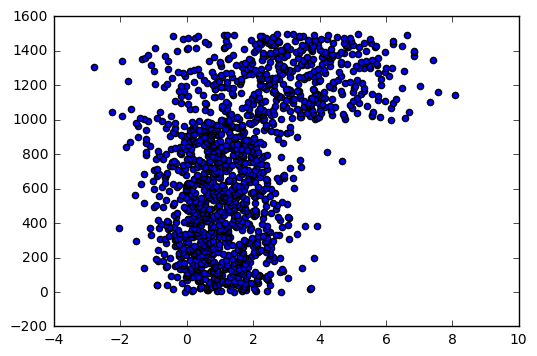

In [55]:
x.shape

(1500, 1)